In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_partidos = pd.read_csv('partidos_cebollitas.csv')
# Filtrar partidos donde Cebollitas FC juegue como local O visitante
df_partidos = df_partidos[(df_partidos['equipo_local'] == 'Cebollitas FC') | (df_partidos['equipo_visitante'] == 'Cebollitas FC')]
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

# Crear variables para el modelo
X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

y_pred = modelo_rl.predict(X_test)  

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcula las metricas 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo:")
print(f"(MSE) Error Cuadrático Medio : {mse:.2f}")
print(f"(RMSE) Raíz del Error Cuadrático Medio : {rmse:.2f}")
print(f"(MAE) Error Absoluto Medio : {mae:.2f}")
print(f"(R^2) Coeficiente de Determinación : {r2:.2f}")
# Mostrar coeficientes del modelo
print(f"Intercepto: {modelo_rl.intercept_}")
print(f"Coeficientes: {modelo_rl.coef_}")

Evaluación del modelo:
(MSE) Error Cuadrático Medio : 3.01
(RMSE) Raíz del Error Cuadrático Medio : 1.73
(MAE) Error Absoluto Medio : 1.52
(R^2) Coeficiente de Determinación : -0.69
Intercepto: -5.3834402473148995
Coeficientes: [ 0.14032761 -0.18235423]


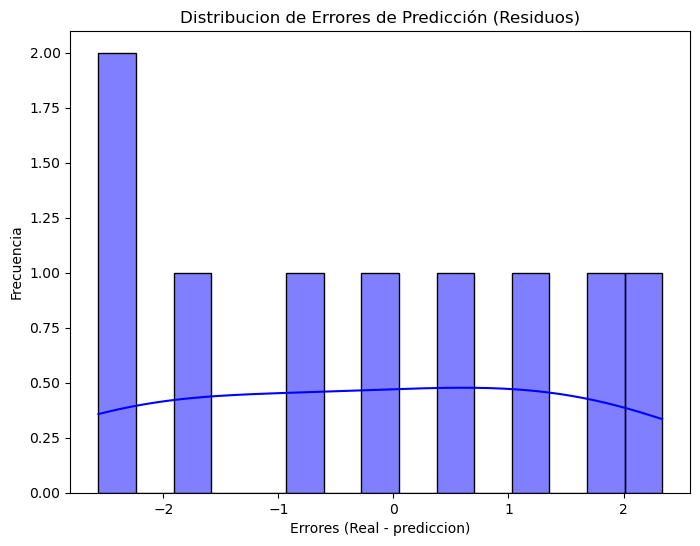

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, bins=15, kde=True, color='blue')
plt.title('Distribucion de Errores de Predicción (Residuos)')
plt.xlabel('Errores (Real - prediccion)')
plt.ylabel('Frecuencia')
plt.show()

In [5]:
import ipywidgets as widgets

def evaluar_modelo(threshold_mae):
    calidad = "buena" if mae <= threshold_mae else "mala"
    print(f"Tu modelo tiene una MAE de: {mae:.2f}, considerada {calidad}, Umbral definido: {threshold_mae})")

umbral_widget = widgets.FloatSlider(min=0.1, max=5, step=0.01, description='Umbral MAE:')
widgets.interactive(evaluar_modelo, threshold_mae=umbral_widget)

interactive(children=(FloatSlider(value=0.1, description='Umbral MAE:', max=5.0, min=0.1, step=0.01), Output()…